<center> <h1 style="background-color:seagreen; color:white" >Análise e Visualização de Dados da Geração Distribuída Fotovoltaica no Brasil</h1></center> 

<center> <h4 style="background-color:DarkKhaki; color:white" >Análise e Visualização dos dados da relação de empreendimentos de Geração Distribuída Fotovoltaica no Brail disponibilizado pela Aneel - (Agência Nacional de Energia Elétrica)</h4></center> 

A Resolução Normativa ANEEL no 482/2012, em vigor desde 17 de abril de 2012, permitiu aos consumidores brasileiros a geração própria de energia elétrica a partir de fontes renováveis ou cogeração qualificada. Este novo modelo, denominado Geração Distribuída de Energia, possibilita que residências, empresas e indústrias se tornem geradoras de energia, podendo inclusive fornecer o excedente para a rede de distribuição local. As unidades consumidoras estão localizadas próximas às geradoras, reduzindo a sobrecarga no sistema de transmissão, e em algumas modalidades, unidades de consumo distantes também podem se beneficiar da energia gerada. A geração distribuída consiste em pequenas unidades geradoras localizadas próximas ao local de consumo, utilizando fontes de energia renováveis. Essa abordagem representa uma alternativa à geração centralizada, que envolve grandes usinas distantes dos centros consumidores.

O Dataset trata de dados referentes aos micro e minigeradores distribuídos, abrangidos pela Resolução Normativa nº 482/2012. A relação dos empreendimentos é classificada pelas variáveis que compõem sua identificação, quais sejam:

<ul>
    <li>Distribuidora conectada;</li>
    <li>Código do empreendimento; </li>
    <li>Núcleo numérico do código do empreendimento; </li>
    <li>Nome do titular; </li>
    <li>Classe de produção; </li>
    <li>Subgrupo; </li>
    <li>Quantidade de unidades consumidoras que recebem os créditos;</li>
    <li>Data da conexão;</li>
    <li>Tipo de unidade produtora;</li>
    <li>Fonte;</li>
    <li>Potência instalada;</li>
    <li>Município e unidade de federação onde está localizada. </li>
</ul>

Os dados são expressos em quantidades e potência instalada em kW (quilowatt). A quantidade corresponde ao número de micro ou minigeradores distribuídos instalados no período especificado. A potência instalada é definida pelo somatório da potência elétrica ativa nominal das unidades geradoras.

A unidade de energia elétrica atualmente utilizada pela ANEEL é o kWh (quilowatt-hora) ou o MWh (megawatt-hora).



In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("ticks")


### Carregando a base de dados

In [36]:
df = pd.read_csv("empreendimento-gd-informacoes-tecnicas-fotovoltaica.csv")

In [37]:
df.head()

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor
0,1,2024-01-30T00:00:00,GD.MG.000.010.856,"18,00","2,34",risen,b&b,2017-05-30T00:00:00,"2,34","2,34",9,,
1,2,2024-01-30T00:00:00,GD.RS.000.010.924,"23,28","3,00",Canadian Solar,Fronius,2017-05-11T00:00:00,"3,20","3,00",10,CS6X-320P,Primo 3.0-1
2,3,2024-01-30T00:00:00,GD.SP.000.010.974,"24,00","3,00",CSUN,AP SYSTEMS,2017-05-19T00:00:00,"3,72","3,00",12,CSUN -72P 310 KW,YC500
3,4,2024-01-30T00:00:00,GD.RS.000.010.988,"21,56","3,63",SunEdison,Fronius,2017-05-24T00:00:00,"3,63","4,00",11,SE-F330BMC34,Primo 4.0-1
4,5,2024-01-30T00:00:00,GD.SP.000.011.006,"14,40","2,38",Canadian,Fronius,2017-05-18T00:00:00,"2,38","2,50",9,CS6P 265 Wp,Galvo 2.5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346000 entries, 0 to 345999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   _id                      346000 non-null  int64 
 1   DatGeracaoConjuntoDados  346000 non-null  object
 2   CodGeracaoDistribuida    346000 non-null  object
 3   MdaAreaArranjo           346000 non-null  object
 4   MdaPotenciaInstalada     346000 non-null  object
 5   NomFabricanteModulo      345998 non-null  object
 6   NomFabricanteInversor    346000 non-null  object
 7   DatConexao               346000 non-null  object
 8   MdaPotenciaModulos       346000 non-null  object
 9   MdaPotenciaInversores    346000 non-null  object
 10  QtdModulos               346000 non-null  int64 
 11  NomModeloModulo          345998 non-null  object
 12  NomModeloInversor        345970 non-null  object
dtypes: int64(2), object(11)
memory usage: 34.3+ MB


<center> <h1 style="background-color:seagreen; color:white" >Descrição dos atribultos da tabela</h1></center> 


| **Nome do Campo**  | **Tipo do dado** | **Tamanho do Campo** | **Descrição** |
| -------------------| -----------------| ---------------------| --------------|
| DatGeracaoConjuntoDados | Data Simples |  |  Data do processamento de carga automática no momento da geração para publicação do conjunto de dados abertos. |
| CodGeracaoDistribuida | Cadeia de caracteres | 21 | Código da Unidade Geradora |
| MdaAreaArranjo | Numérico | 8,2  | Total da área de Arranjo |
| MdaPotenciaInstalada  | Numérico  | 6,2 |  Medida da potência instalada |
| NomFabricanteModulo | Cadeia de caracteres | 100 | Nome do fabricante do módulo |
| NomFabricanteInversor  | Cadeia de caracteres | 100 | Nome do fabricante do inversor |
| DatConexao | Data Simples |  | Data da conexão da Unidade Geradora |
| MdaPotenciaModulos | Numérico | 6,2 | Armazena os dados expressos em quantidades e potência dos módulos em MW (quilowatt), definida pela somatória das potências elétricas ativas nominais dos módulos da central de geração distribuída |
| MdaPotenciaInversores | Numérico | 6,2 | Armazena os dados expressos em quantidades e potência dos inversores em MW (quilowatt), definida pela somatória das potências elétricas ativas nominais dos módulos da central de geração distribuída |
| QtdModulos | Numérico | 10 | Quantidade de Módulos |
| NomModeloModulo |  Cadeia de caracteres | 100 | Nome do modelo do Módulo |
| NomModeloInversor | Cadeia de caracteres | 100 | Nome do modelo do Inversor |


<center> <h1 style="background-color:seagreen; color:white" >Análise Exploratória de Dados</h1></center> 

<center> <h3 style="background-color:#868661; color:white" >Tratamento dos dados numéricos</h3></center>


Convertendo os dados numericos para a notação que a linguagem de programação entenda, para isso é necessário substituir a virgula por ponto e depois converter a informação que antes erá uma string python para um valor numérico, para esse processo foi usado o método **.aplly()** além disso, usou-se o método array do NumPy para converter os dados em numéricos float32.

Colunas convertidas: 

<ul>
    <li>MdaAreaArranjo</li>
    <li>MdaPotenciaInstalada</li>
    <li>MdaPotenciaModulos</li>
    <li>MdaPotenciaInversores</li>
</ul>


Antes:
`18,00` String

Depois:
`18.00` float32


In [39]:
df["MdaAreaArranjo"] = np.array(df["MdaAreaArranjo"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaInstalada"] = np.array(df["MdaPotenciaInstalada"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaModulos"] = np.array(df["MdaPotenciaModulos"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaInversores"] = np.array(df["MdaPotenciaInversores"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["QtdModulos"] = np.array(df["QtdModulos"].apply(lambda x: float(x)), dtype="float32")

<center> <h3 style="background-color:#868661; color:white" >Convertendo as colunas de data para o tipo <strong>datitime</strong> do pandas</h3></center>

Para realizar essa conversão usa-se o método `.to_datitime()`, as colunas `DatGeracaoConjuntoDados`e `DatConexao` serão convertidas para esse formato.

In [40]:
df["DatGeracaoConjuntoDados"] = pd.to_datetime(df["DatGeracaoConjuntoDados"])
df["DatConexao"] = pd.to_datetime(df["DatConexao"])

<center> <h3 style="background-color:#868661; color:white" >Criando atribultos Ano, Mês e Dia</h3></center>

In [41]:
df["Year"] = df["DatConexao"].apply(lambda x: x.year)
df["Month"] = df["DatConexao"].apply(lambda x: x.month)
df["Day"] = df["DatConexao"].apply(lambda x: x.day)

In [42]:
df.head(-1)

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor,Year,Month,Day
0,1,2024-01-30,GD.MG.000.010.856,18.000000,2.34,risen,b&b,2017-05-30,2.34,2.34,9.0,,,2017,5,30
1,2,2024-01-30,GD.RS.000.010.924,23.280001,3.00,Canadian Solar,Fronius,2017-05-11,3.20,3.00,10.0,CS6X-320P,Primo 3.0-1,2017,5,11
2,3,2024-01-30,GD.SP.000.010.974,24.000000,3.00,CSUN,AP SYSTEMS,2017-05-19,3.72,3.00,12.0,CSUN -72P 310 KW,YC500,2017,5,19
3,4,2024-01-30,GD.RS.000.010.988,21.559999,3.63,SunEdison,Fronius,2017-05-24,3.63,4.00,11.0,SE-F330BMC34,Primo 4.0-1,2017,5,24
4,5,2024-01-30,GD.SP.000.011.006,14.400000,2.38,Canadian,Fronius,2017-05-18,2.38,2.50,9.0,CS6P 265 Wp,Galvo 2.5,2017,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345994,345995,2024-01-30,GD.TO.000.353.296,36.480000,6.84,CANADIAN SOLAR,SOFAR SOLAR,2020-07-14,6.84,7.50,19.0,CS3U 360P,SOFAR 7.5KTLM,2020,7,14
345995,345996,2024-01-30,GD.TO.000.353.364,80.000000,10.00,JINKO SOLAR,PHB SOLAR,2020-07-08,13.20,10.00,40.0,JKM330PP-72,D-NS PHB5000D-NS,2020,7,8
345996,345997,2024-01-30,GD.TO.000.353.396,35.639999,5.00,BYD,GROWATT,2020-07-20,6.03,5.00,18.0,335 PHK-36,5000MTL-US,2020,7,20
345997,345998,2024-01-30,GD.TO.000.353.432,27.580000,4.00,RISEN SOLAR,RENOVIGI,2020-07-22,4.76,4.00,14.0,RSM144-6-340P,RENO-4K PLUS,2020,7,22


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346000 entries, 0 to 345999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   _id                      346000 non-null  int64         
 1   DatGeracaoConjuntoDados  346000 non-null  datetime64[ns]
 2   CodGeracaoDistribuida    346000 non-null  object        
 3   MdaAreaArranjo           346000 non-null  float32       
 4   MdaPotenciaInstalada     346000 non-null  float32       
 5   NomFabricanteModulo      345998 non-null  object        
 6   NomFabricanteInversor    346000 non-null  object        
 7   DatConexao               346000 non-null  datetime64[ns]
 8   MdaPotenciaModulos       346000 non-null  float32       
 9   MdaPotenciaInversores    346000 non-null  float32       
 10  QtdModulos               346000 non-null  float32       
 11  NomModeloModulo          345998 non-null  object        
 12  NomModeloInverso

<center> <h1 style="background-color:seagreen; color:white" >Plotando a Distribuição de Atribultos ​​do conjunto de dados</h1></center> 

In [44]:
df_datconexao_2017 = df[df["Year"] == 2017]
df_datconexao_2017

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor,Year,Month,Day
0,1,2024-01-30,GD.MG.000.010.856,18.000000,2.34,risen,b&b,2017-05-30,2.340000,2.34,9.0,,,2017,5,30
1,2,2024-01-30,GD.RS.000.010.924,23.280001,3.00,Canadian Solar,Fronius,2017-05-11,3.200000,3.00,10.0,CS6X-320P,Primo 3.0-1,2017,5,11
2,3,2024-01-30,GD.SP.000.010.974,24.000000,3.00,CSUN,AP SYSTEMS,2017-05-19,3.720000,3.00,12.0,CSUN -72P 310 KW,YC500,2017,5,19
3,4,2024-01-30,GD.RS.000.010.988,21.559999,3.63,SunEdison,Fronius,2017-05-24,3.630000,4.00,11.0,SE-F330BMC34,Primo 4.0-1,2017,5,24
4,5,2024-01-30,GD.SP.000.011.006,14.400000,2.38,Canadian,Fronius,2017-05-18,2.380000,2.50,9.0,CS6P 265 Wp,Galvo 2.5,2017,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296686,296687,2024-01-30,GD.SP.000.282.480,22.610001,3.92,CANADIAN SOLAR,FRONIUS,2017-11-08,3.920000,4.00,14.0,CANADIAN SOLAR,FRONIUS,2017,11,8
297472,297473,2024-01-30,GD.SP.000.271.624,9.000000,1.50,CANADIAN SOLAR,CANADIAN SOLAR,2017-10-01,1.500000,1.50,5.0,CS6X-320P,CSI-1.5K-TL,2017,10,1
300887,300888,2024-01-30,GD.GO.000.285.020,570.000000,75.00,GCL,FRONIUS,2017-12-20,92.620003,75.00,285.0,GCL P6/72-325,SYMO 25.0-3-M,2017,12,20
329683,329684,2024-01-30,GD.MS.000.250.443,244.000000,36.00,49 - ZNSHINE SOLAR,53 - GOODWE,2017-09-22,41.580002,36.00,126.0,191 - ZXP6-72-330-P,361 - GW36K-MT,2017,9,22


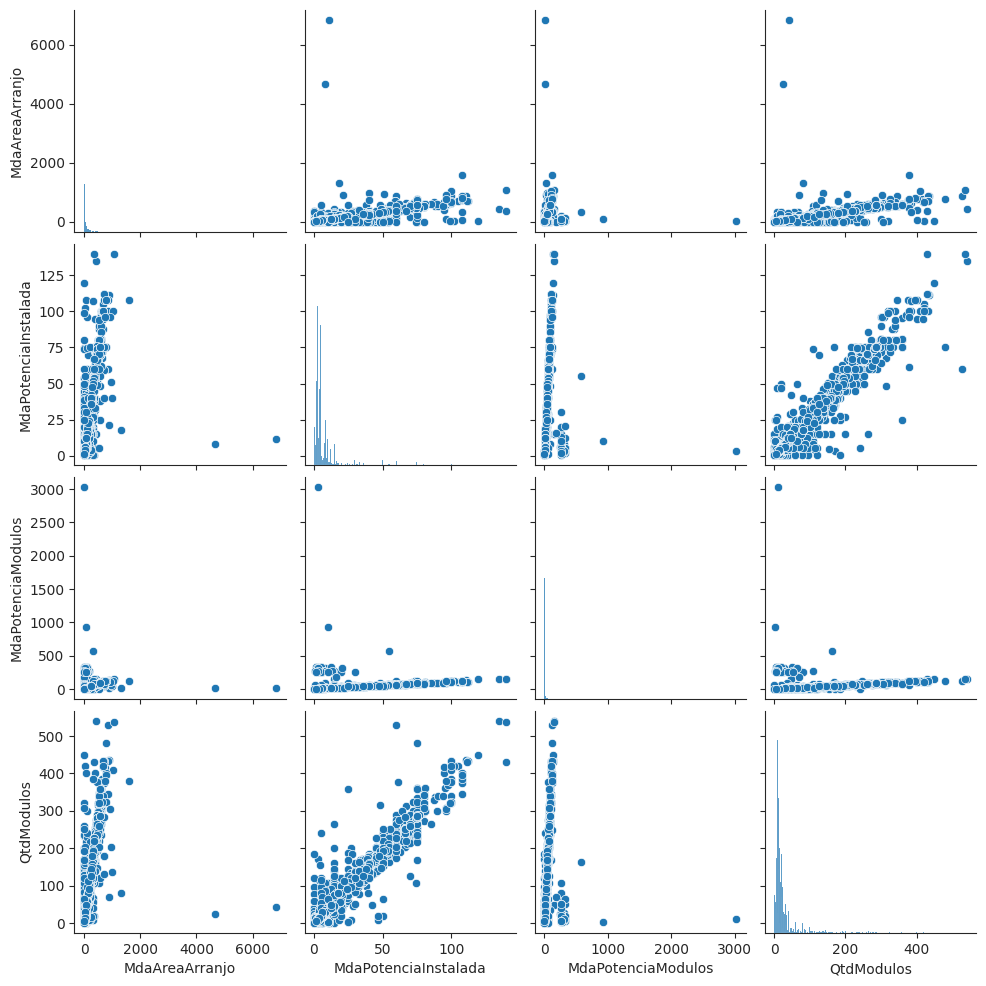

In [64]:
sns.pairplot(df_datconexao_2017[df_datconexao_2017["MdaPotenciaInstalada"] < 150],
             x_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"],
             y_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"])

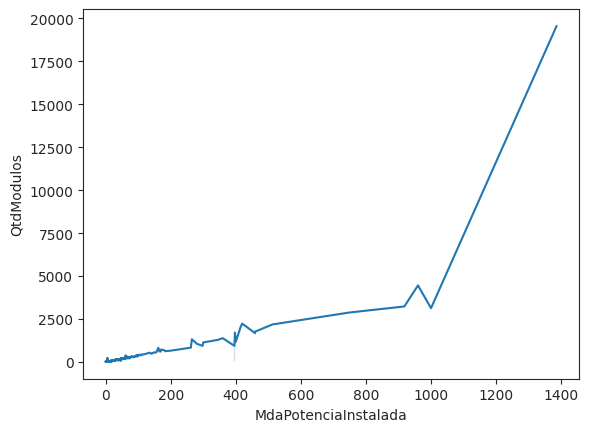

In [57]:
sns.lineplot(data=df_datconexao_2017,
             x="MdaPotenciaInstalada", y="QtdModulos")
plt.show()

<center> <h3 style="background-color:#868661; color:white" >Dados anuais do setor</h3></center>

In [58]:
df_datconexao_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12847 entries, 0 to 339527
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      12847 non-null  int64         
 1   DatGeracaoConjuntoDados  12847 non-null  datetime64[ns]
 2   CodGeracaoDistribuida    12847 non-null  object        
 3   MdaAreaArranjo           12847 non-null  float32       
 4   MdaPotenciaInstalada     12847 non-null  float32       
 5   NomFabricanteModulo      12847 non-null  object        
 6   NomFabricanteInversor    12847 non-null  object        
 7   DatConexao               12847 non-null  datetime64[ns]
 8   MdaPotenciaModulos       12847 non-null  float32       
 9   MdaPotenciaInversores    12847 non-null  float32       
 10  QtdModulos               12847 non-null  float32       
 11  NomModeloModulo          12847 non-null  object        
 12  NomModeloInversor        12847 non-n

**Medida da potência instalada**

In [66]:
df_datconexao_2017["MdaPotenciaInstalada"].sum()

118092.78

In [65]:
df_datconexao_2017["MdaPotenciaInstalada"].mean()

9.1922455

**Quantidade de empreendimentos conectados a rede em 2017**

In [61]:
df_datconexao_2017["DatConexao"].count()

12847

**Quantidade de Fabricantes de inversores em 2017 usado nas instalações**

In [62]:
df_datconexao_2017["NomFabricanteInversor"].nunique()

884